In [10]:
import pandas as pd
import matplotlib as mpl
import numpy as np

In [11]:
def read_csv(file_name):
    return pd.read_csv(file_name)

yad2_df = read_csv('raw_yad2_data_test.csv')
homeless_df = read_csv('raw_homeless_data_test.csv')

df = pd.concat([yad2_df, homeless_df], ignore_index=True, sort=False)
df.head()


,Post link,City,Neighborhood,Size,Number of rooms,Floor number,Taxes,Price,Room mates,Furniture,Elevator,Air conditioner,Parking,Balcony,Bars,Shelter,Storeroom,Renovated,Boiler,Pets allowed
0,ru8q1kyv,סביניה,מרכז העיר,105,4,2,1000.0,4000.0,1,1,1,1,1,0.0,1,1,1,1,1,1
1,lc0eawvk,אשדוד,רובע ב',68,3,3,450.0,3300.0,1,1,1,1,0,0.0,1,1,1,1,1,1
2,k5vqkej7,חיפה,הדר מרכז,45,1,4,1.0,NaN,1,1,1,1,0,0.0,1,1,1,1,1,1
3,c4jltnfv,תל אביב יפו,נאות אפקה ב',90,3,1,NaN,6700.0,1,1,1,1,1,1.0,1,1,1,1,1,1
4,t37185rk,רחובות,חצרות המושבה,108,4,17,NaN,6400.0,1,1,1,1,1,0.0,1,1,1,1,1,1


# Cleaning the data

In [12]:
df.drop_duplicates(['Post link'])
df.dropna(subset=['Price', 'City'], inplace=True)
df.dropna(subset=['Size', 'Number of rooms'],thresh=2, inplace=True)
df.shape

(60, 20)

#### Fill missing values

In [13]:
df['Number of rooms'].fillna(value=df['Number of rooms'].median(),inplace=True)
df['Size'].fillna(value=df['Size'].median(),inplace=True)

#### Handle Outliers

In [14]:
from pandas.api.types import is_numeric_dtype

columns_list = ['Size', 'Price']
for col in columns_list:
    q1=np.percentile(df[col],25)
    q3=np.percentile(df[col],75)
    iqr=q3-q1
    df = df[(df[col] > q1-1.5*iqr) & (df[col] < q3+1.5*iqr)]

df.head()

,Post link,City,Neighborhood,Size,Number of rooms,Floor number,Taxes,Price,Room mates,Furniture,Elevator,Air conditioner,Parking,Balcony,Bars,Shelter,Storeroom,Renovated,Boiler,Pets allowed
0,ru8q1kyv,סביניה,מרכז העיר,105,4,2,1000.0,4000.0,1,1,1,1,1,0.0,1,1,1,1,1,1
1,lc0eawvk,אשדוד,רובע ב',68,3,3,450.0,3300.0,1,1,1,1,0,0.0,1,1,1,1,1,1
3,c4jltnfv,תל אביב יפו,נאות אפקה ב',90,3,1,NaN,6700.0,1,1,1,1,1,1.0,1,1,1,1,1,1
4,t37185rk,רחובות,חצרות המושבה,108,4,17,NaN,6400.0,1,1,1,1,1,0.0,1,1,1,1,1,1
6,exlooaxm,קרית אונו,קיראון,109,4,1,NaN,6000.0,1,1,1,1,0,0.0,1,1,1,1,1,1


# Visualization

#### Amount of records per each city

<AxesSubplot:ylabel='None'>

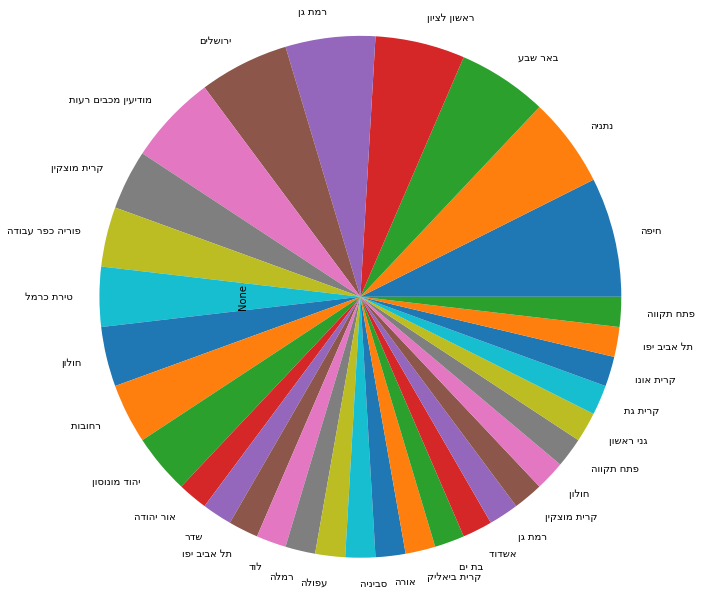

In [15]:
city_count = df['City'].value_counts()
reverse_cities_names = []
for name, value in city_count.items():
    reverse_cities_names.append(name[::-1])
flipped = pd.Series(city_count.values, index=reverse_cities_names)
flipped.plot(kind='pie', radius=3)

<AxesSubplot:>

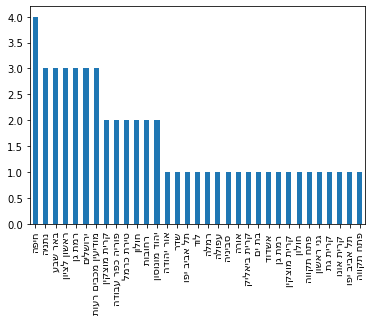

In [16]:
flipped.plot(kind='bar')

# Machine learning

#### Split label

In [17]:
y = df['Price']
X = df.drop(['Price'], axis=1)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

#### Scailing